In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import random
from mpl_toolkits.mplot3d import axes3d

In [9]:
# V_0 = Initial Assets
# M = No. of outcomes in game
# p_1 = probability of 1st outcome (heads)
# p_2 = probability of 2nd outcome (tails)
# k_1 = return from 1st outcome
# k_2 = return from 2nd outcome
# f = fraction of assets invested per play of game

V_0 = 100
M = 2
p_1 = .5
p_2 = .5
k_1 = 250
k_2 = -50


In [10]:
p = [p_1, p_2]
k = [k_1, k_2]

f = -(p_1*k_1 + p_2*k_2)/(k_1*k_2*(p_1 + p_2))
print(f)

0.008


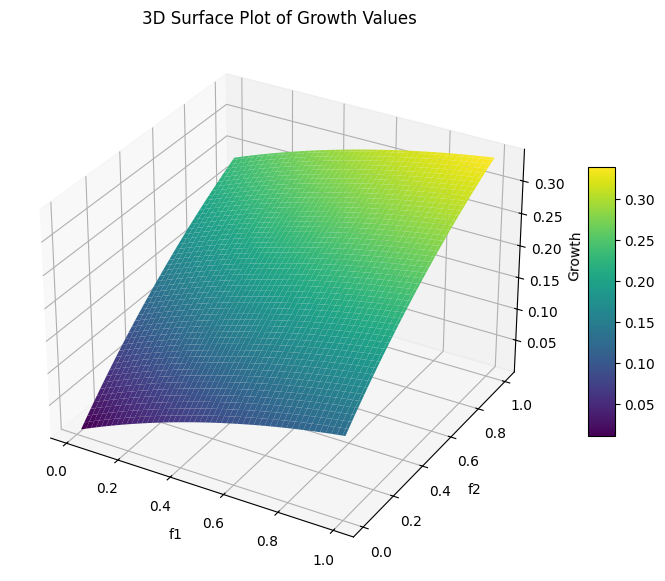

In [ ]:
# Coin 1 flip : It will return a number between 1 and 100
# We let H for Coin 1 be a win and T a loss, and give a value for P(H) and P(T).
def flip1(p1):
    return 'H' if random.random() < p1 else 'T'


# Coin 2 flip : It will return a number between 1 and 100
# We let H for Coin 2 be a loss and T a win, and give a value for P(H) and P(T).
def flip2(p2):
    return 'H' if random.random() < p2 else 'T'


# This function simulates a play of the game 
# we flip the 2 coins, getting an outcome for each, and return both outcomes
def playGame(p1, p2):
    result1 = flip1(p1)
    result2 = flip2(p2)
    
    outcome = [result1, result2]
    
    return outcome

# We calculate the new value of wealth generated from playing the game
# We wager a proportion of our wealth based on f1 and f2
# We then get a return on the wagers based on the outcomes of each game
# We then return the sum of our remaining assets and add the new value of the assets we put in the game
def NewValueOfWealth(f1, f2, wealth):
    wager1 = wealth * f1
    wager2 = wealth * f2

    outcome = playGame(p1,p2)
    
    if outcome[0] == 'H':
        wager1 += k1_H*wager1
    else:
        wager1 += k1_T*wager1
        
    if outcome[1] == 'T':
        wager2 += k2_H*wager2
    else:
        wager2 += k2_T*wager2
    
    return wealth*(1 - f1 - f2) + wager1 + wager2


# We define the variables for our program
V0 = 1000  # initial wealth
plays_of_game = 50  # we will play the game 100 times (100 coin flips)
num_runs = 100  # We will repeat the simulation of playing the game 100 times 1000 times to get our average growth rate


p1 = 0.6  # P(H) for coin 1
p2 = 0.7  # P(H) for coin 2

k1_H = 0.5  # Return on coin 1 given H
k1_T = -0.5  # Return on coin 1 given T
k2_H = -0.5  # Return on coin 2 given H
k2_T = 0.6  # Return on coin 2 given T


def getGrowth(f1,f2):
    growth_rate = 0  # This will determine the average growth rate for a given investment fraction f = (f1,f2)
    
    for i in range(num_runs):
        wealth = [V0]
        for i in range(1,plays_of_game):
            wealth.append(NewValueOfWealth(f1,f2, wealth[-1]))
            
        growth_rate += 1/plays_of_game * np.log(wealth[-1]/wealth[0])
    
    average_growth = growth_rate/num_runs 
    return average_growth

growth_list = []
fraction_list = np.arange(0.01, 1.01, 0.01)

F1, F2 = np.meshgrid(fraction_list, fraction_list)


'''matrix = np.dstack((F1, F2))

for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        pair = matrix[i][j]
        growth_list.append(getGrowth(pair[0], pair[1]))
        
        
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot.wireframe(fraction_list, fraction_list, growth_list, rstride=10, cstride=10)


plt.show()'''

def growth(x,y):    
    return getGrowth(x,y)

growth_values = growth(F1, F2)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111,projection='3d')
surface = ax.plot_surface(F1,F2, growth_values, cmap="viridis")

ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('Growth')

fig.colorbar(surface, shrink=0.5, aspect=10)

plt.title("3D Surface Plot of Growth Values")
plt.show()
